In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from matplotlib.lines import Line2D
import numpy as np
from pathlib import Path
import polars as pl
import h5py

print(plt.style.available)

plt.style.use("bmh")
# Make all new figures/axes transparent by default
plt.rcParams["figure.facecolor"] = "none"  # or (1, 1, 1, 0)
plt.rcParams["axes.facecolor"] = "none"

plt.rcParams.update(
    {
        "font.family": "serif",
        "font.serif": ["Latin Modern Roman"],
        "mathtext.fontset": "cm",  # still fine; there is no LMR math in mathtext
    }
)
plt.rcParams.update(
    {
        "text.usetex": True,
        # Tell LaTeX to load any package you like
        "text.latex.preamble": r"\usepackage{amssymb}",  # not lmodern
    }
)
# plt.style.use('fivethirtyeight') # For slide

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [2]:
f = h5py.File('SC-SW_10_000_000/SC/results.h5', 'r')
B005_SC_Tp = f['B=0.05']['T+'][:]
B005_SC_T0 = f['B=0.05']['T0'][:]
B005_SC_S = f['B=0.05']['S'][:]
B005_SC_Tm = f['B=0.05']['T-'][:]
B005_SC_time = f['B=0.05']['time_ns'][:]

f = h5py.File('SC-SW_10_000_000/SW/results.h5', 'r')
B005_SW_Tp = f['B=0.05']['T+'][:]
B005_SW_T0 = f['B=0.05']['T0'][:]
B005_SW_S = f['B=0.05']['S'][:]
B005_SW_Tm = f['B=0.05']['T-'][:]
B005_SW_time = f['B=0.05']['time_ns'][:]

In [3]:
dirname = Path("mps-m1-B0.50")
B050m1_1024 = np.load(dirname / "radicalpair_sse_1024samples_1m_0.5B.npz")
B050m1_2048 = np.load(dirname / "radicalpair_sse_2048samples_1m_0.5B.npz")
B050m1_4096 = np.load(dirname / "radicalpair_sse_4096samples_1m_0.5B.npz")

dirname = Path("mps-m16-B0.05")
B005m16_4096 = np.load(dirname / "radicalpair_sse_4096samples_16m_0.05B.npz")
dirname = Path("mps-m16-B0.50")
B050m16_4096 = np.load(dirname / "radicalpair_sse_4096samples_16m_0.5B.npz")
dirname = Path("mps-m16-B5.00")
B500m16_4096 = np.load(dirname / "radicalpair_sse_4096samples_16m_5.0B.npz")

dirname = Path("mps-m64-B0.05")
B005m64_1024 = np.load(dirname / "radicalpair_sse_1024samples_64m_0.05B.npz")
B005m64_2048 = np.load(dirname / "radicalpair_sse_2048samples_64m_0.05B.npz")
B005m64_4096 = np.load(dirname / "radicalpair_sse_4096samples_64m_0.05B.npz")

dirname = Path("mps-m64-B0.50")
B050m64_1024 = np.load(dirname / "radicalpair_sse_1024samples_64m_0.5B.npz")
B050m64_2048 = np.load(dirname / "radicalpair_sse_2048samples_64m_0.5B.npz")
B050m64_4096 = np.load(dirname / "radicalpair_sse_4096samples_64m_0.5B.npz")

dirname = Path("mps-m64-B5.00")
B500m64_1024 = np.load(dirname / "radicalpair_sse_1024samples_64m_5.0B.npz")
B500m64_2048 = np.load(dirname / "radicalpair_sse_2048samples_64m_5.0B.npz")
B500m64_4096 = np.load(dirname / "radicalpair_sse_4096samples_64m_5.0B.npz")

dirname = Path("mps-m128-B0.05")
B005m128_4096 = np.load(dirname / "radicalpair_sse_4096samples_128m_0.05B.npz")

In [4]:
time = B050m1_4096["time"] * 1000

dm_B050m1_1024 = B050m1_1024["density"]
dm_B050m1_2048 = B050m1_2048["density"]
dm_B050m1_4096 = B050m1_4096["density"]

dm_B005m16_4096 = B005m16_4096["density"]
dm_B005m64_1024 = B005m64_1024["density"]
dm_B005m64_2048 = B005m64_2048["density"]
dm_B005m64_4096 = B005m64_4096["density"]
dm_B005m128_4096 = B005m128_4096["density"]

dm_B050m16_4096 = B050m16_4096["density"]
dm_B050m64_1024 = B050m64_1024["density"]
dm_B050m64_2048 = B050m64_2048["density"]
dm_B050m64_4096 = B050m64_4096["density"]

dm_B500m16_4096 = B500m16_4096["density"]
dm_B500m64_1024 = B500m64_1024["density"]
dm_B500m64_2048 = B500m64_2048["density"]
dm_B500m64_4096 = B500m64_4096["density"]

In [5]:
# full QM
from utils import parse_output
df_B005_4096 = parse_output("./full-4096/out", "0.050", dt=1.0e-09)[:-3]
df_B050_4096 = parse_output("./full-4096/out", "0.500", dt=1.0e-09)[:-3]
df_B500_4096 = parse_output("./full-4096/out", "5.000", dt=1.0e-09)[:-3]

df_B005_4096 = df_B005_4096.with_columns(
    (pl.col("time") * 1000).alias("time")  # overwrite the same name
)
df_B050_4096 = df_B050_4096.with_columns(
    (pl.col("time") * 1000).alias("time")  # overwrite the same name
)
df_B500_4096 = df_B500_4096.with_columns(
    (pl.col("time") * 1000).alias("time")  # overwrite the same name
)

In [6]:
# vMPDO
from pytdscf import util

data = util.read_nc(
    "vmpdo-chi64-B0.05/reduced_density.nc", sites=((11, 11),)
)
dm_B005_chi64 = data[(11, 11)]
data = util.read_nc(
    "vmpdo-chi256-B0.05/reduced_density.nc", sites=((11, 11),)
)
dm_B005_chi256 = data[(11, 11)]
data = util.read_nc(
    "vmpdo-chi256-B0.50/reduced_density.nc", sites=((11, 11),)
)
dm_B050_chi256 = data[(11, 11)]
data = util.read_nc(
    "vmpdo-chi256-B5.00/reduced_density.nc", sites=((11, 11),)
)
dm_B500_chi256 = data[(11, 11)]
data = util.read_nc(
    "vmpdo-chi1024-B0.05/reduced_density.nc", sites=((11, 11),)
)
dm_B005_chi1024 = data[(11, 11)]
data = util.read_nc(
    "vmpdo-chi1536-B0.05/reduced_density.nc", sites=((11, 11),)
)
dm_B005_chi1536 = data[(11, 11)]

In [7]:
## LPMPS
data = util.read_nc(
    "lpmps-r64-B0.05/reduced_density.nc", sites=((22,),)
)
dm_B005_r64 = data[(22,)]
data = util.read_nc(
    "lpmps-r256-B0.05/reduced_density.nc", sites=((22,),)
)
dm_B005_r256 = data[(22,)]
data = util.read_nc(
    "lpmps-r256-B0.50/reduced_density.nc", sites=((22,),)
)
dm_B050_r256 = data[(22,)]
data = util.read_nc(
    "lpmps-r256-B5.00/reduced_density.nc", sites=((22,),)
)
dm_B500_r256 = data[(22,)]
data = util.read_nc(
    "lpmps-r1024-B0.05/reduced_density.nc", sites=((22,),)
)
dm_B005_r1024 = data[(22,)]
data = util.read_nc(
    "lpmps-r1536-B0.05/reduced_density.nc", sites=((22,),)
)
dm_B005_r1536 = data[(22,)]

In [8]:
markers = ["o", "v", "^", "<", ">", "8", "s", "p", "*", "h"]


def _plot_inset(
    colors,
    line_styles,
    dms,
    variables,
    title,
    filename,
    var="K",
    ylim_inset=(0.10, 0.30),
):
    """
    Generates a main plot with an inset, designed to display population dynamics.

    Args:
        colors (list): List of colors for the different T-types.
        line_styles (list): List of line styles for different K-values.
        dms (list of np.ndarray): List of density matrix data, where each element
                                  is a (time_steps, 4, 4) array.
        variables (list): List of K-values corresponding to the dms.
        title (str): Title for the main plot.
        filename (str): Filename to save the plot.
        var (str): Variable name for the legend (e.g., 'K').
        ylim_inset (tuple): Y-axis limits for the inset plot.

    Returns:
        tuple: A tuple containing the matplotlib Figure and Axes objects.
    """
    fig, ax = plt.subplots(figsize=(6, 4))

    # Assuming 'time' is defined globally or passed as an argument.
    # For this example, we'll use a dummy 'time' array.
    # global time # Declare time as global for this example, or pass it as an argument
    # time = np.linspace(0, 0.2, dms[0].shape[0]) # Adjust based on your actual time data

    # Main plot
    for i, (dm, ls) in enumerate(zip(dms, line_styles, strict=True)):
        for j in range(4):
            # Labels for the main plot's legend (which will be replaced by custom legend)
            # if i == 0:
            #    label = f"${['T_{+}', 'T', 'S', 'T_{-}'][j]}$, ${var}={variables[i]}$"
            # else:
            #    label = f"${var}={variables[i]}$"
            if dm.ndim == 3:
                ax.plot(time, dm[:, j, j].real, color=colors[j], ls=ls, lw=1)
            else:
                ax.plot(time, dm[:, j].real, color=colors[j], ls=ls, lw=1)

    ax.set_title(title)
    ax.set_xlabel("time / ns")
    ax.set_ylabel("population")
    ax.set_xticks([0, 40, 80, 120, 160, 200])
    ax.set_xlim(0, 200)
    ax.set_ylim(0, 1.0)
    # ax.tick_params(axis="x", rotation=45)
    ax.grid(ls=":")

    # The original legend from plot_inset will be overwritten by the custom legend
    # leg = ax.legend(ncol=len(dms), fontsize=8)

    # Create inset **to the right**
    axins = inset_axes(
        ax,
        width="50%",
        height="100%",  # make it as big as bbox_to_anchor allows
        bbox_to_anchor=(
            1.15,
            0.0,
            1.05,
            1,
        ),  # enlarge the bbox to 35% width of main axes
        bbox_transform=ax.transAxes,
        loc="center left",
        borderpad=0,
    )

    # Plot the same lines in the inset
    for i, (dm, ls) in enumerate(zip(dms, line_styles)):
        for j in range(4):
            if dm.ndim == 3:
                axins.plot(time, dm[:, j, j].real, color=colors[j], ls=ls, lw=1.5)
            else:
                axins.plot(time, dm[:, j].real, color=colors[j], ls=ls, lw=1.5)

    axins.set_xlim(100, 200)
    axins.set_ylim(*ylim_inset)
    axins.set_xlabel("time / ns")
    # axins.tick_params(axis="x", rotation=45)
    axins.grid(ls=":")

    # Add rectangle & connectors from main axes
    mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="black")

    return fig, ax  # Return fig and ax for custom legend placement


def add_matrix_legend(fig, colors, line_styles, variables, var="K", bottom=0.64):
    T_types = ["$T_+$", "$T_0$", "$S$", "$T_-$"]
    # --- 4. Create the Custom Matrix Legend on the same figure ---
    # Define the position and size of the legend axes within the figure.
    # Adjusted position to top-right, with increased width and height for more margin.
    # [left, bottom, width, height] in figure coordinates (0 to 1).
    legend_ax_position = [
        0.9 - 0.13 * len(variables),
        bottom,
        0.13 * len(variables),
        0.24,
    ]  # Increased width to 0.3 and height to 0.25
    legend_ax = fig.add_axes(legend_ax_position)

    # Optional: Set background color and frame for the legend box
    legend_ax.set_facecolor("#f9f9f9")  # A light grey background
    legend_ax.set_frame_on(True)  # Draw a frame around the legend axes
    legend_ax.set_xticks([])  # Hide x-axis ticks
    legend_ax.set_yticks([])  # Hide y-axis ticks

    # Calculate cell dimensions for the legend grid
    num_cols = len(variables)
    num_rows = len(T_types)

    # Total grid dimensions including the header row (for K values) and
    # the first column (for T types)
    grid_cols = num_cols + 1
    grid_rows = num_rows + 1

    # Width and height of each cell in legend_ax coordinates (0 to 1)
    cell_width = 1.0 / grid_cols
    cell_height = 1.0 / grid_rows

    # --- Add K-value labels (Header Row) ---
    for i, val in enumerate(variables):
        # Position for K-value text: (column index + 1) * cell_width + half_cell_width, row 0
        x_pos = (i + 1) * cell_width + cell_width / 2
        y_pos = 1 - cell_height / 2  # Top row, vertically centered
        if var is None:
            label = val
        else:
            label = f"${var}={val}$"
        legend_ax.text(
            x_pos,
            y_pos,
            label,
            ha="center",
            va="center",  # Horizontal and vertical alignment
            fontsize=10,
            fontweight="bold",
            transform=legend_ax.transAxes,
        )  # Use transAxes for coordinates relative to legend_ax

    # --- Add T-type labels (First Column) ---
    for j, t_type in enumerate(T_types):
        # Position for T-type text: column 0, (row index + 1) * cell_height + half_cell_height
        x_pos = cell_width / 2  # Leftmost column, horizontally centered
        y_pos = 1 - (j + 1) * cell_height - cell_height / 2
        legend_ax.text(
            x_pos,
            y_pos,
            t_type,
            ha="center",
            va="center",
            fontsize=10,
            fontweight="bold",
            transform=legend_ax.transAxes,
        )

    # --- Add Line Elements for each (T_type, K_value) combination ---
    for j, t_type in enumerate(T_types):  # Iterate through rows (T-types)
        for i, val in enumerate(variables):  # Iterate through columns (K-values)
            # Create a Line2D object to represent the line style and color.
            line_proxy = Line2D(
                [0, 1],
                [0, 1],  # Dummy x,y data for the line segment
                linestyle=line_styles[i],  # Use dict for direct lookup
                color=colors[j],  # Use dict for direct lookup
                linewidth=1.5,
            )  # Adjust linewidth for better visibility

            # Calculate the position for the line segment within its cell
            line_x_start = (i + 1) * cell_width + cell_width * 0.1
            line_x_end = (i + 1) * cell_width + cell_width * 0.9
            line_y_pos = 1 - (j + 1) * cell_height - cell_height / 2

            # Add the Line2D object to the legend axes
            legend_ax.add_line(
                Line2D(
                    [line_x_start, line_x_end],
                    [line_y_pos, line_y_pos],
                    linestyle=line_styles[i],
                    color=colors[j],
                    linewidth=1.5,
                    transform=legend_ax.transAxes,
                )
            )


def plot_inset(
    colors,
    line_styles,
    dms,
    variables,
    title,
    filename,
    var="K",
    ylim_inset=(0.10, 0.30),
):
    """
    Generates a plot using plot_inset and then adds a custom matrix-style legend.
    The legend displays line styles and colors based on 'K' values and 'T' types.
    """

    fig, ax = _plot_inset(
        colors=colors,
        line_styles=line_styles,
        dms=dms,
        variables=variables,
        title=title,
        filename=filename,
        var=var,
        ylim_inset=ylim_inset,  # Example inset y-limits
    )
    add_matrix_legend(fig, colors, line_styles, variables, var=var)
    plt.savefig(filename, bbox_inches="tight")
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


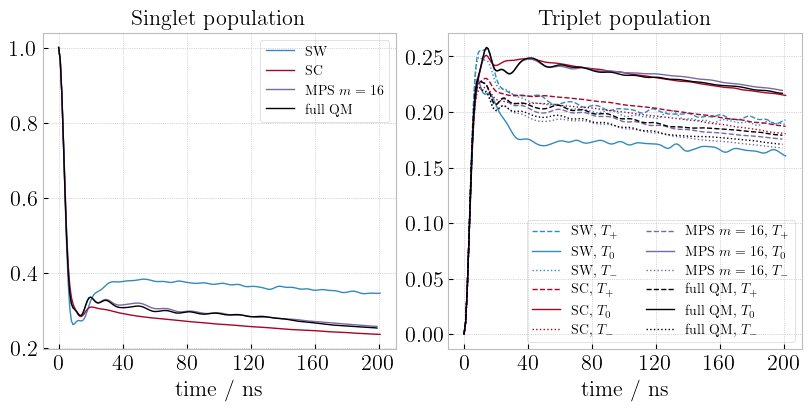

In [9]:
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

fig, (axS, axT) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, constrained_layout=True)

# --- Left: Singlet ---
axS.plot(
    B005_SW_time, B005_SW_S,
    label=r"SW", ls="-", lw=1, color=colors[0],
)
axS.plot(
    B005_SC_time, B005_SC_S,
    label=r"SC", ls="-", lw=1, color=colors[1],
)
axS.plot(
    time, dm_B005m16_4096[:, 2].real,
    label=r"MPS $m=16$", ls="-", lw=1, color=colors[2],
)
axS.plot(
    df_B005_4096["time"], df_B005_4096["S_prob"],
    label="full QM", ls="-", lw=1, color="black",
)

xticks = [0, 40, 80, 120, 160, 200]
axS.set_xticks(xticks)
axS.set_xlabel("time / ns", fontsize=16)
axS.set_title("Singlet population", fontsize=16)
axS.legend()
axS.grid(ls=":")
axS.tick_params(axis="both", labelsize=16)

# --- Right: Triplet ---
axT.plot(
    B005_SW_time, B005_SW_Tp,
    label=r"SW, $T_+$", ls="--", markevery=10, color=colors[0], lw=1,
)
axT.plot(
    B005_SW_time, B005_SW_T0,
    label=r"SW, $T_0$", ls="-", color=colors[0], lw=1,
)
axT.plot(
    B005_SW_time, B005_SW_Tm,
    label=r"SW, $T_-$", ls=":", markevery=10, color=colors[0], lw=1,
)

axT.plot(
    B005_SC_time, B005_SC_Tp,
    label=r"SC, $T_+$", ls="--", markevery=10, color=colors[1], lw=1,
)
axT.plot(
    B005_SC_time, B005_SC_T0,
    label=r"SC, $T_0$", ls="-", color=colors[1], lw=1,
)
axT.plot(
    B005_SC_time, B005_SC_Tm,
    label=r"SC, $T_-$", ls=":", markevery=10, color=colors[1], lw=1,
)

axT.plot(
    time, dm_B005m16_4096[:, 0].real,
    label=r"MPS $m=16$, $T_+$", ls="--", markevery=10, color=colors[2], lw=1,
)
axT.plot(
    time, dm_B005m16_4096[:, 1].real,
    label=r"MPS $m=16$, $T_0$", ls="-", markevery=10, color=colors[2], lw=1,
)
axT.plot(
    time, dm_B005m16_4096[:, 3].real,
    label=r"MPS $m=16$, $T_-$", ls=":", markevery=10, color=colors[2], lw=1,
)

axT.plot(
    df_B005_4096["time"], df_B005_4096["Tp_prob"],
    label="full QM, $T_+$", color="black", ls="--", markevery=10, lw=1,
)
axT.plot(
    df_B005_4096["time"], df_B005_4096["T0_prob"],
    label="full QM, $T_0$", color="black", ls="-", lw=1,
)
axT.plot(
    df_B005_4096["time"], df_B005_4096["Tm_prob"],
    label="full QM, $T_-$", color="black", ls=":", markevery=10, lw=1,
)

axT.set_xticks(xticks)
axT.set_xlabel("time / ns", fontsize=16)
axT.set_title("Triplet population", fontsize=16)
axT.legend(ncol=2)
axT.grid(ls=":")
axT.tick_params(axis="both", labelsize=16)
plt.savefig("B005-SW-vs-SC-vs-m16-vs-full.eps", bbox_inches="tight")
plt.show()

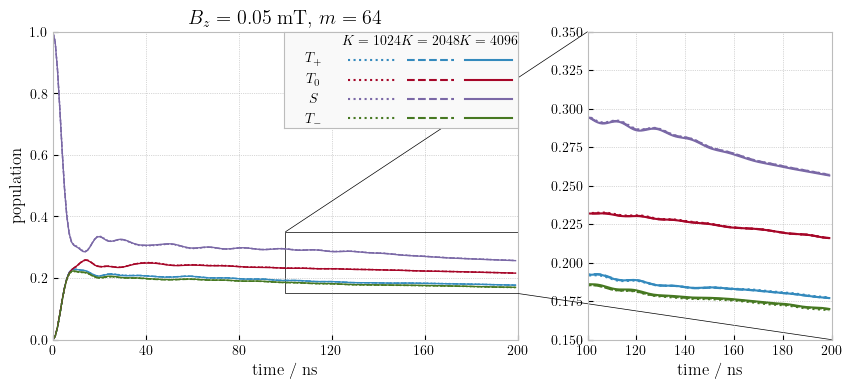

In [10]:
dms = [dm_B005m64_1024, dm_B005m64_2048, dm_B005m64_4096]
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"][:4]
line_styles = [":", "--", "-"]
Ks = [1024, 2048, 4096]
title = r"$B_z = 0.05\;\mathrm{mT} $, $m = 64$"
filename = "pop-m64-B005-with-right-inset.eps"
plot_inset(colors, line_styles, dms, Ks, title, filename, ylim_inset=(0.15, 0.35))

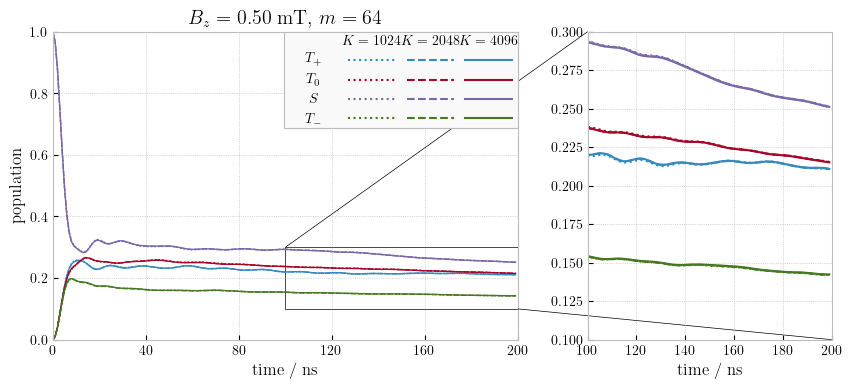

In [11]:
dms = [dm_B050m64_1024, dm_B050m64_2048, dm_B050m64_4096]
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"][:4]
line_styles = [":", "--", "-"]
Ks = [1024, 2048, 4096]
title = r"$B_z = 0.50\;\mathrm{mT} $, $m = 64$"
filename = "pop-m64-B050-with-right-inset.eps"
plot_inset(colors, line_styles, dms, Ks, title, filename)

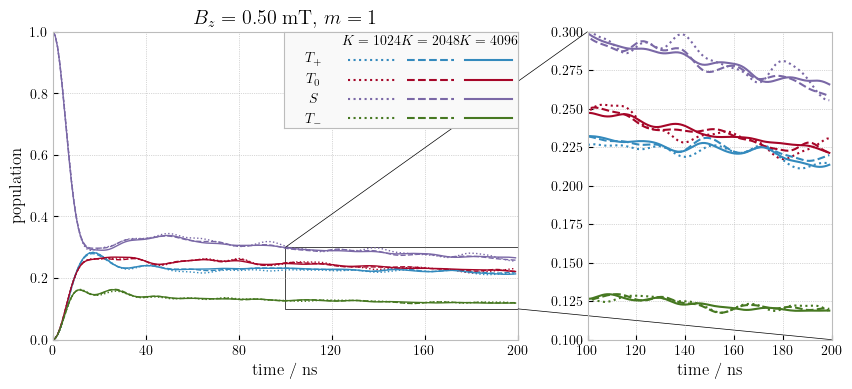

In [12]:
dms = [dm_B050m1_1024, dm_B050m1_2048, dm_B050m1_4096]
title = r"$B_z = 0.50\;\mathrm{mT} $, $m = 1$"
filename = "pop-m1-B050-with-right-inset.eps"
plot_inset(colors, line_styles, dms, Ks, title, filename)

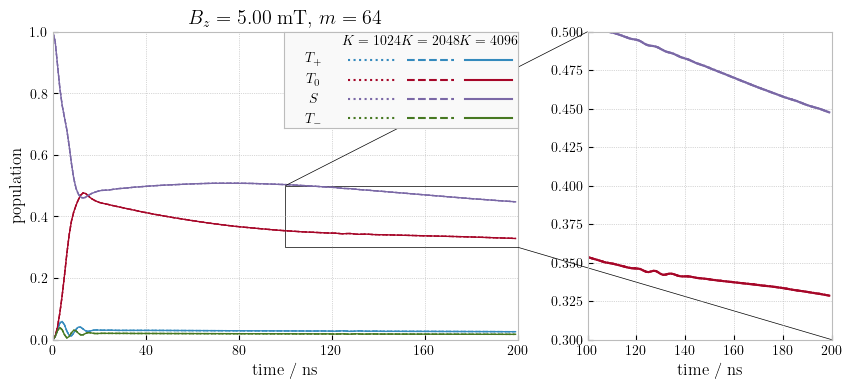

In [13]:
dms = [dm_B500m64_1024, dm_B500m64_2048, dm_B500m64_4096]
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"][:4]
line_styles = [":", "--", "-"]
title = r"$B_z = 5.00\;\mathrm{mT} $, $m = 64$"
filename = "pop-m64-B500-with-right-inset.eps"
plot_inset(colors, line_styles, dms, Ks, title, filename, ylim_inset=(0.30, 0.50))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


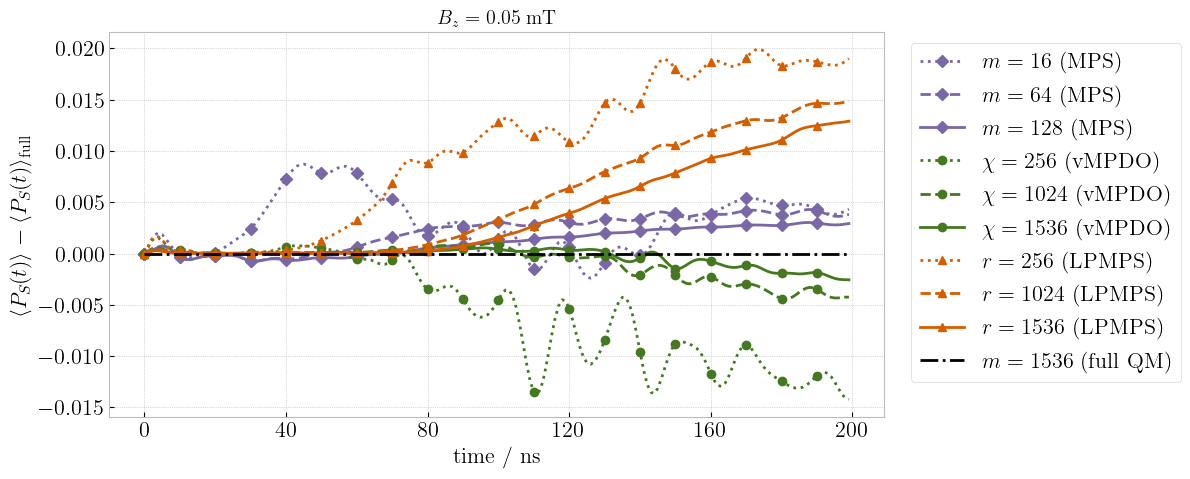

In [14]:
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
line_styles = [":", "-.", "-"]
# variables = [r"$\chi=1536$", r"$m=64, K=4096$", r"$\mathrm{full}, K=4096$"]
variables = [r"$\chi=1536$", r"$m=128, K=4096$", r"$\mathrm{full}, K=4096$"]
fig = plt.figure(figsize=(10, 5))

ref = df_B005_4096["S_prob"]
np.testing.assert_allclose(time, df_B005_4096["time"])

plt.plot(
    time,
    dm_B005m16_4096[:, 2].real - ref,
    label=r"$m=16$ (MPS)",
    ls=":",
    color=colors[2],
    marker="D",
    markevery=10,
)
plt.plot(
    time,
    dm_B005m64_4096[:, 2].real - ref,
    label=r"$m=64$ (MPS)",
    ls="--",
    color=colors[2],
    marker="D",
    markevery=10,
)
plt.plot(
    time,
    dm_B005m128_4096[:, 2].real - ref,
    label=r"$m=128$ (MPS)",
    ls="-",
    color=colors[2],
    marker="D",
    markevery=10,
)

plt.plot(
    time,
    dm_B005_chi256[:, 2, 2].real - ref,
    label=r"$\chi=256$ (vMPDO)",
    ls=":",
    color=colors[3],
    marker="o",
    markevery=10,
)
plt.plot(
    time,
    dm_B005_chi1024[:, 2, 2].real - ref,
    label=r"$\chi=1024$ (vMPDO)",
    ls="--",
    color=colors[3],
    marker="o",
    markevery=10,
)
plt.plot(
    time,
    dm_B005_chi1536[:, 2, 2].real - ref,
    label=r"$\chi=1536$ (vMPDO)",
    ls="-",
    color=colors[3],
    marker="o",
    markevery=10,
)


plt.plot(
    time,
    dm_B005_r256[:, 2].real - ref,
    label=r"$r=256$ (LPMPS)",
    ls=":",
    color=colors[4],
    marker="^",
    markevery=10,
)
plt.plot(
    time,
    dm_B005_r1024[:, 2].real - ref,
    label=r"$r=1024$ (LPMPS)",
    ls="--",
    color=colors[4],
    marker="^",
    markevery=10,
)
plt.plot(
    time,
    dm_B005_r1536[:, 2].real - ref,
    label=r"$r=1536$ (LPMPS)",
    ls="-",
    color=colors[4],
    marker="^",
    markevery=10,
)

plt.plot(
    time,
    ref-ref,
    label=r"$m=1536$ (full QM)",
    ls="-.",
        color="black",
)
plt.title(r"$B_z=0.05\;\mathrm{mT}$")
plt.xticks([0, 40, 80, 120, 160, 200], fontsize=16)
plt.yticks([0.020, 0.015, 0.010, 0.005, 0.0, -0.005, -0.010, -0.015], fontsize=16)
# plt.legend(ncol=3)
plt.xlabel("time / ns", fontsize=16)
plt.ylabel(
    r"$\langle P_S(t)\rangle - \langle P_S(t)\rangle_{\mathrm{full}}$", fontsize=16
)
# plt.xticks(rotation=45, ha="right")
plt.grid(ls=":")
# add_matrix_legend(fig, colors, line_styles, variables, var=None)
plt.legend(fontsize=16, bbox_to_anchor=(1.02, 1.0))
plt.savefig("B005-deviation.eps", bbox_inches="tight")
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


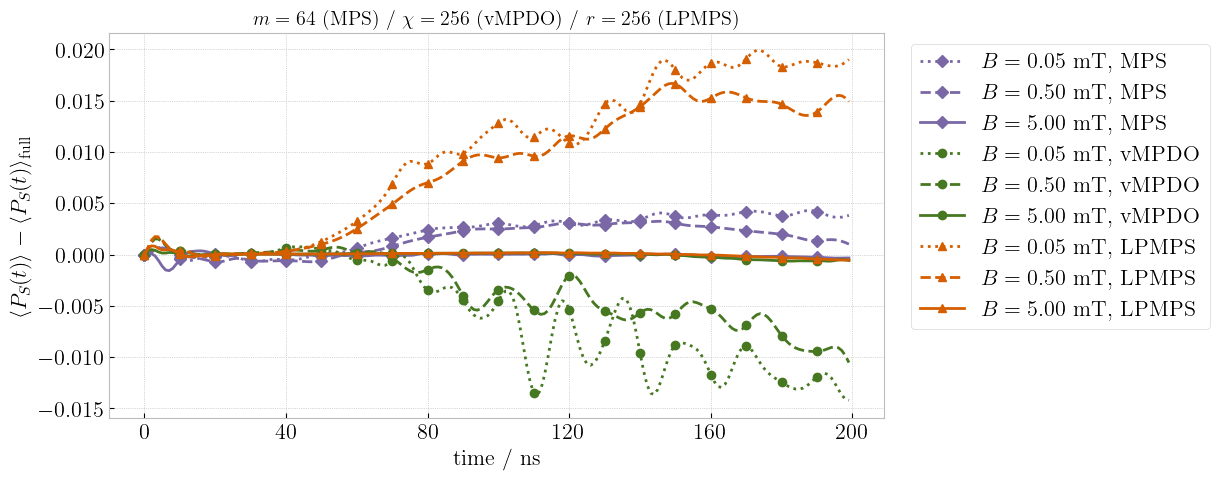

In [15]:
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
line_styles = [":", "-.", "-"]
fig = plt.figure(figsize=(10, 5))
np.testing.assert_allclose(time, df_B005_4096["time"])
ref_B005 = df_B005_4096["S_prob"]
ref_B050 = df_B050_4096["S_prob"]
ref_B500 = df_B500_4096["S_prob"]

plt.plot(
    time,
    dm_B005m64_4096[:, 2].real - ref_B005,
    label=r"$B=0.05$ mT, MPS",
    ls=":",
    color=colors[2],
    marker="D",
    markevery=10,
)
plt.plot(
    time,
    dm_B050m64_4096[:, 2].real - ref_B050,
    label=r"$B=0.50$ mT, MPS",
    ls="--",
    color=colors[2],
    marker="D",
    markevery=10,
)
plt.plot(
    time,
    dm_B500m64_4096[:, 2].real - ref_B500,
    label=r"$B=5.00$ mT, MPS",
    ls="-",
    color=colors[2],
    marker="D",
    markevery=10,
)

plt.plot(
    time,
    dm_B005_chi256[:, 2, 2].real - ref_B005,
    label=r"$B=0.05$ mT, vMPDO",
    ls=":",
    color=colors[3],
    marker="o",
    markevery=10,
)
plt.plot(
    time,
    dm_B050_chi256[:, 2, 2].real - ref_B050,
    label=r"$B=0.50$ mT, vMPDO",
    ls="--",
    color=colors[3],
    marker="o",
    markevery=10,
)
plt.plot(
    time,
    dm_B500_chi256[:, 2, 2].real - ref_B500,
    label=r"$B=5.00$ mT, vMPDO",
    ls="-",
    color=colors[3],
    marker="o",
    markevery=10,
)


plt.plot(
    time,
    dm_B005_r256[:, 2].real - ref_B005,
    label=r"$B=0.05$ mT, LPMPS",
    ls=":",
    color=colors[4],
    marker="^",
    markevery=10,
)
plt.plot(
    time,
    dm_B050_r256[:, 2].real - ref_B050,
    label=r"$B=0.50$ mT, LPMPS",
    ls="--",
    color=colors[4],
    marker="^",
    markevery=10,
)
plt.plot(
    time,
    dm_B500_r256[:, 2].real - ref_B500,
    label=r"$B=5.00$ mT, LPMPS",
    ls="-",
    color=colors[4],
    marker="^",
    markevery=10,
)
plt.title(r"$m=64$ (MPS) / $\chi=256$ (vMPDO) / $r=256$ (LPMPS)")
plt.xticks([0, 40, 80, 120, 160, 200], fontsize=16)
plt.yticks([0.020, 0.015, 0.010, 0.005, 0.0, -0.005, -0.010, -0.015], fontsize=16)
# plt.legend(ncol=3)
plt.xlabel("time / ns", fontsize=16)
plt.ylabel(
    r"$\langle P_S(t)\rangle - \langle P_S(t)\rangle_{\mathrm{full}}$", fontsize=16
)
# plt.xticks(rotation=45, ha="right")
plt.grid(ls=":")
# add_matrix_legend(fig, colors, line_styles, variables, var=None)
plt.legend(fontsize=16, bbox_to_anchor=(1.02, 1.0))
plt.savefig("B-behaviour.eps", bbox_inches="tight")
plt.show()